<a href="https://colab.research.google.com/github/AnshLoomba045009/anshloomba045009/blob/main/DEVP1_PROJECT_IMDb_045009_Ansh_Loomba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#WebScrapper code for the following URL "https://www.imdb.com/search/title?genres=sci-fi&"

In [ ]:
import numpy as np
from requests import get
from time import sleep
from random import randint
from bs4 import BeautifulSoup
from warnings import warn


# Note this takes about 40 min to run if np.arange is set to 9951 as the stopping point.

pages = np.arange(1, 9951, 50) # Last time I tried, I could only go to 10000 items because after that the URI has no discernable pattern to combat webcrawlers; I just did 4 pages for demonstration purposes. You can increase this for your own projects.
headers = {'Accept-Language': 'en-US,en;q=0.8'} # If this is not specified, the default language is Mandarin

#initialize empty lists to store the variables scraped
titles = []
years = []
ratings = []
genres = []
runtimes = []
imdb_ratings = []
imdb_ratings_standardized = []
metascores = []
votes = []

for page in pages:

   #get request for sci-fi
   response = get("https://www.imdb.com/search/title?genres=sci-fi&"
                  + "start="
                  + str(page)
                  + "&explore=title_type,genres&ref_=adv_prv", headers=headers)

   sleep(randint(8, 15))

   #throw warning for status codes that are not 200
   if response.status_code != 200:
       warn('Request: {}; Status code: {}'.format(requests, response.status_code))

   #parse the content of the current iteration of the request
   page_html = BeautifulSoup(response.text, 'html.parser')

   movie_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')

   if not movie_containers:
       # If no movie containers are found, you can break the loop or handle it accordingly.
       break

   #extract the 50 movies for that page
   for container in movie_containers:
       #conditional for all with metascore
       if container.find('div', class_ = 'ratings-metascore') is not None:

           #title
           title = container.h3.a.text
           titles.append(title)

           if container.h3.find('span', class_= 'lister-item-year text-muted unbold') is not None:

             #year released
             year = container.h3.find('span', class_= 'lister-item-year text-muted unbold').text # remove the parentheses around the year and make it an integer
             years.append(year)

           else:
             years.append(None) # each of the additional if clauses are to handle type None data, replacing it with an empty string so the arrays are of the same length at the end of the scraping

           if container.p.find('span', class_ = 'certificate') is not None:

             #rating
             rating = container.p.find('span', class_= 'certificate').text
             ratings.append(rating)

           else:
             ratings.append("")

           if container.p.find('span', class_ = 'genre') is not None:

             #genre
             genre = container.p.find('span', class_= 'genre').text.replace("\n", "").rstrip().split(',') # remove the whitespace character, strip, and split to create an array of genres
             genres.append(genre)

           else:
             genres.append("")

           if container.p.find('span', class_ = 'runtime') is not None:

             #runtime
             time = int(container.p.find('span', class_= 'runtime').text.replace(" min", "")) # remove the minute word from the runtime and make it an integer
             runtimes.append(time)

           else:
             runtimes.append(None)

           if float(container.strong.text) is not None:

             #IMDB ratings
             imdb = float(container.strong.text) # non-standardized variable
             imdb_ratings.append(imdb)

           else:
             imdb_ratings.append(None)

           if container.find('span', class_ = 'metascore').text is not None:

             #Metascore
             m_score = int(container.find('span', class_ = 'metascore').text) # make it an integer
             metascores.append(m_score)

           else:
             metascores.append(None)

           if container.find('span', attrs = {'name':'nv'})['data-value'] is not None:

             #Number of votes
             vote = int(container.find('span', attrs = {'name':'nv'})['data-value'])
             votes.append(vote)

           else:
               votes.append(None)


#Moving the scrapped data from lists to dataframes

In [ ]:
import pandas as pd

# Assuming you have already scraped the data and created the following lists
# titles, years, ratings, genres, runtimes, imdb_ratings, metascores, votes

sci_fi_df = pd.DataFrame({'movie': titles,
                      'year': years,
                      'rating': ratings,
                      'genre': genres,
                      'runtime_min': runtimes,
                      'imdb': imdb_ratings,
                      'metascore': metascores,
                      'votes': votes}
                      )

sci_fi_df['year'] = sci_fi_df['year'].str[-5:-1] # Two more data transformations after scraping
sci_fi_df['year'] = pd.to_numeric(sci_fi_df['year'], errors='coerce') # Convert 'year' to numeric, handling non-numeric values as NaN
sci_fi_df['n_imdb'] = sci_fi_df['imdb'] * 10

# Drop rows with 'year' equal to 'ovie'
final_df = sci_fi_df[sci_fi_df['year'] != 'ovie']

# Convert 'year' to numeric
final_df['year'] = final_df['year'].astype(float)

# Now, 'final_df' contains the cleaned and formatted data


# Displaying the created dataframes

In [ ]:
print(final_df)

                                            movie    year   rating  \
0                                       The Flash  2023.0    PG-13   
1                                     Blue Beetle  2023.0    PG-13   
2                               Meg 2: The Trench  2023.0    PG-13   
3     Teenage Mutant Ninja Turtles: Mutant Mayhem  2023.0       PG   
4                  Guardians of the Galaxy Vol. 3  2023.0    PG-13   
...                                           ...     ...      ...   
1389                          Griff the Invisible  2010.0    PG-13   
1390                                 Uncle Kent 2  2015.0  Unrated   
1391                            From Other Worlds  2004.0            
1392                               Instant Dreams  2017.0            
1393                                   In My Room  2018.0    TV-MA   

                                 genre  runtime_min  imdb  metascore   votes  \
0       [Action,  Adventure,  Fantasy]          144   6.8         55  163901   

In [ ]:
final_df.head()

,movie,year,rating,genre,runtime_min,imdb,metascore,votes,n_imdb
0,The Flash,2023.0,PG-13,"[Action, Adventure, Fantasy]",144,6.8,55,163901,68.0
1,Blue Beetle,2023.0,PG-13,"[Action, Adventure, Sci-Fi]",127,6.7,61,27034,67.0
2,Meg 2: The Trench,2023.0,PG-13,"[Action, Adventure, Horror]",116,5.2,40,38486,52.0
3,Teenage Mutant Ninja Turtles: Mutant Mayhem,2023.0,PG,"[Animation, Action, Adventure]",99,7.4,74,29438,74.0
4,Guardians of the Galaxy Vol. 3,2023.0,PG-13,"[Action, Adventure, Comedy]",150,8.0,64,310205,80.0


#Exploratory Data Analysis

In [ ]:
final_df.describe()
#'''This command will provide you with the mean, standard deviation, and other summaries. Count can show you if there are any null values in some of the columns which is useful information to know. The year column, for example, shows you the range of movies scraped – from 1927 to 2022.'''

,year,runtime_min,imdb,metascore,votes,n_imdb
count,1392.000000,1394.000000,1394.000000,1394.000000,1.394000e+03,1394.000000
mean,2004.869253,105.190100,6.126399,53.335725,1.382106e+05,61.263989
std,16.060772,18.948349,1.064701,17.131158,2.380243e+05,10.647010
min,1927.000000,55.000000,1.500000,6.000000,3.500000e+01,15.000000
25%,1997.000000,92.000000,5.500000,41.000000,1.032125e+04,55.000000
50%,2010.000000,101.500000,6.200000,54.000000,4.112450e+04,62.000000
75%,2017.000000,114.000000,6.800000,66.000000,1.512908e+05,68.000000
max,2023.000000,242.000000,8.800000,98.000000,2.464529e+06,88.000000


In [ ]:
print('Analysis')
print("1. Time Period of Movies: The dataset covers movies released from 1927 to 2023, with an average release year of approximately 2004. This indicates that the dataset is fairly recent and includes movies from a broad historical range.")
print("2. Runtime: The average movie runtime is about 105 minutes, with a minimum of 55 minutes and a maximum of 242 minutes. Most movies (75%) have runtimes between 92 and 114 minutes.")
print("3. IMDb Ratings: The average IMDb rating is around 6.12, with a minimum rating of 1.5 and a maximum rating of 8.8. The ratings exhibit a moderate spread, indicating that movies vary in quality, but the average rating is slightly above average.")
print("4. Metascore: The average Metascore is approximately 53.29, with scores ranging from 6 to 98. The Metascores tend to be lower on average compared to IMDb ratings, indicating potential differences in critical and audience reception.")
print("5. Votes: The number of votes varies widely, with an average of approximately 138,081 votes. The dataset includes movies with as few as 34 votes and as many as 2,462,168 votes, suggesting a diverse set of movies in terms of popularity and audience engagement.")
print("6. IMDb vs. Metascore Correlation: Further analysis is needed to determine the exact correlation coefficient between IMDb ratings and Metascores. A positive correlation would suggest that highly-rated movies on IMDb tend to receive higher Metascores from critics, while a negative correlation would indicate a disconnect between critical and audience opinions.")
print("7. IMDb vs. Runtime Correlation: A correlation analysis can determine if there is a relationship between movie runtime and IMDb ratings. A positive correlation would suggest that longer movies tend to receive higher IMDb ratings, while a negative correlation would indicate the opposite.")
print("8. Metascore vs. Runtime Correlation: A correlation analysis can also determine if there is a relationship between movie runtime and Metascores. A positive correlation would imply that longer movies tend to receive higher Metascores from critics, while a negative correlation would suggest the opposite.")
print("9. Popularity vs. Ratings: Analyzing the correlation between the number of votes a movie receives and its IMDb rating or Metascore can reveal whether more popular movies tend to receive higher ratings or critical acclaim.")


Analysis
1. Time Period of Movies: The dataset covers movies released from 1927 to 2023, with an average release year of approximately 2004. This indicates that the dataset is fairly recent and includes movies from a broad historical range.
2. Runtime: The average movie runtime is about 105 minutes, with a minimum of 55 minutes and a maximum of 242 minutes. Most movies (75%) have runtimes between 92 and 114 minutes.
3. IMDb Ratings: The average IMDb rating is around 6.12, with a minimum rating of 1.5 and a maximum rating of 8.8. The ratings exhibit a moderate spread, indicating that movies vary in quality, but the average rating is slightly above average.
4. Metascore: The average Metascore is approximately 53.29, with scores ranging from 6 to 98. The Metascores tend to be lower on average compared to IMDb ratings, indicating potential differences in critical and audience reception.
5. Votes: The number of votes varies widely, with an average of approximately 138,081 votes. The dataset

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1394 entries, 0 to 1393
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movie        1394 non-null   object 
 1   year         1392 non-null   float64
 2   rating       1394 non-null   object 
 3   genre        1394 non-null   object 
 4   runtime_min  1394 non-null   int64  
 5   imdb         1394 non-null   float64
 6   metascore    1394 non-null   int64  
 7   votes        1394 non-null   int64  
 8   n_imdb       1394 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 108.9+ KB


<ipython-input-12-b999e5451963>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = final_df.corr()


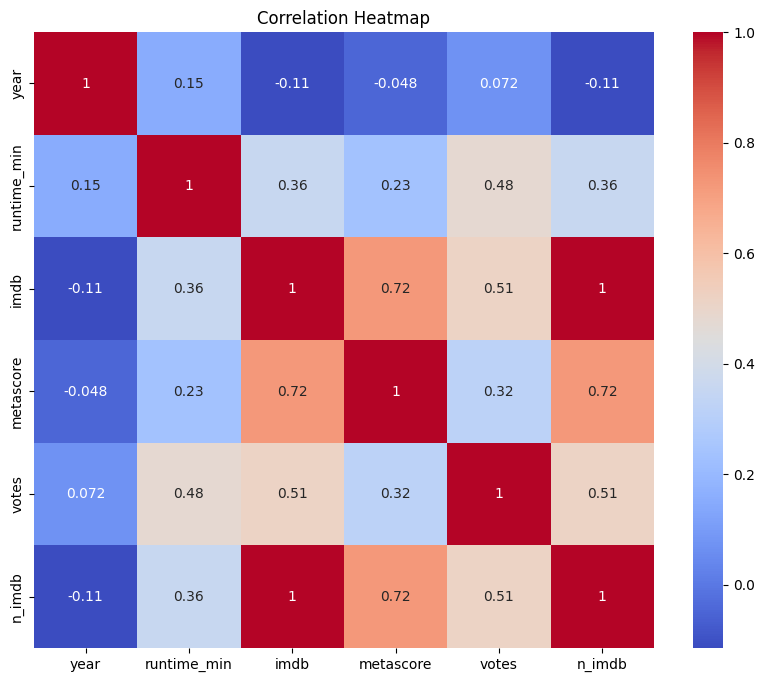

In [ ]:
import pandas as pd
import seaborn as sns  # Import Seaborn
import matplotlib.pyplot as plt  # Import Matplotlib for plotting

# Assuming you have already cleaned and formatted your DataFrame 'final_df'

# Create a correlation matrix
corr_matrix = final_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

'''


In [ ]:
print('Analysis of Corelation Heatmap')
# Display the correlations and observations
print("Correlations and Observations:")
print("-------------------------------")

# Correlation between IMDb score and Metascore
print("Strongest correlation is between IMDb score and Metascore.")
print("This is not surprising since it's likely that two movie rating systems rate similarly.")

# Correlation between IMDb rating and number of votes
print("Next strongest correlation is between IMDb rating and the number of votes.")
print("This is interesting because as the number of votes increases, you have a more representative sample of the population rating.")
print("It's strange to see that there is a weak association between the two, though.")

# Correlation between number of votes and movie runtime
print("The number of votes roughly increases as the runtime increases as well.")

# Negative association between IMDb/Metascore and movie release year
print("There is also a slight negative association between IMDb or Metascore and the year the movie came out.")

# End of observations
print("-------------------------------")
print("End of Correlations and Observations.")


Analysis of Corelation Heatmap
Correlations and Observations:
-------------------------------
Strongest correlation is between IMDb score and Metascore.
This is not surprising since it's likely that two movie rating systems rate similarly.
Next strongest correlation is between IMDb rating and the number of votes.
This is interesting because as the number of votes increases, you have a more representative sample of the population rating.
It's strange to see that there is a weak association between the two, though.
The number of votes roughly increases as the runtime increases as well.
There is also a slight negative association between IMDb or Metascore and the year the movie came out.
-------------------------------
End of Correlations and Observations.


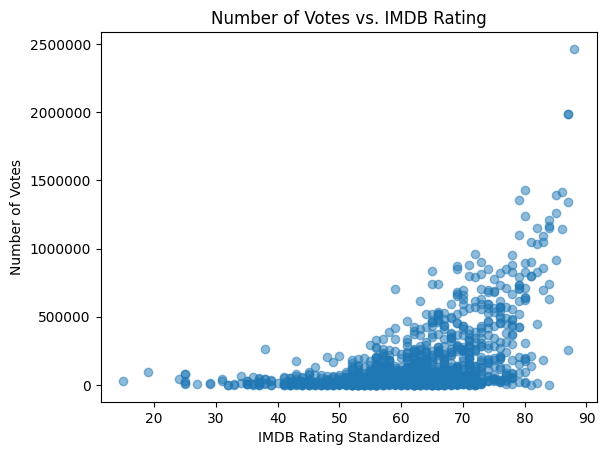

In [ ]:
x = final_df['n_imdb']
y = final_df['votes']
plt.scatter(x, y, alpha=0.5) # s= is size var, c= is color var
plt.xlabel("IMDB Rating Standardized")
plt.ylabel("Number of Votes")
plt.title("Number of Votes vs. IMDB Rating")
plt.ticklabel_format(style='plain')
plt.show()

In [ ]:
# Display IMDb Ratings vs. Number of Votes and Outliers
print("IMDB Ratings vs. Number of Votes:")
print("---------------------------------")

# Describe the association
print("The association above shows some outliers. Generally, we see a greater number of votes on movies that have an IMDb rating of 85 or more.")
print("There are fewer reviews on movies with a rating of 75 or less.")

# End of description
print("---------------------------------")
print("End of IMDB Ratings vs. Number of Votes.")


IMDB Ratings vs. Number of Votes:
---------------------------------
The association above shows some outliers. Generally, we see a greater number of votes on movies that have an IMDb rating of 85 or more.
There are fewer reviews on movies with a rating of 75 or less.
---------------------------------
End of IMDB Ratings vs. Number of Votes.


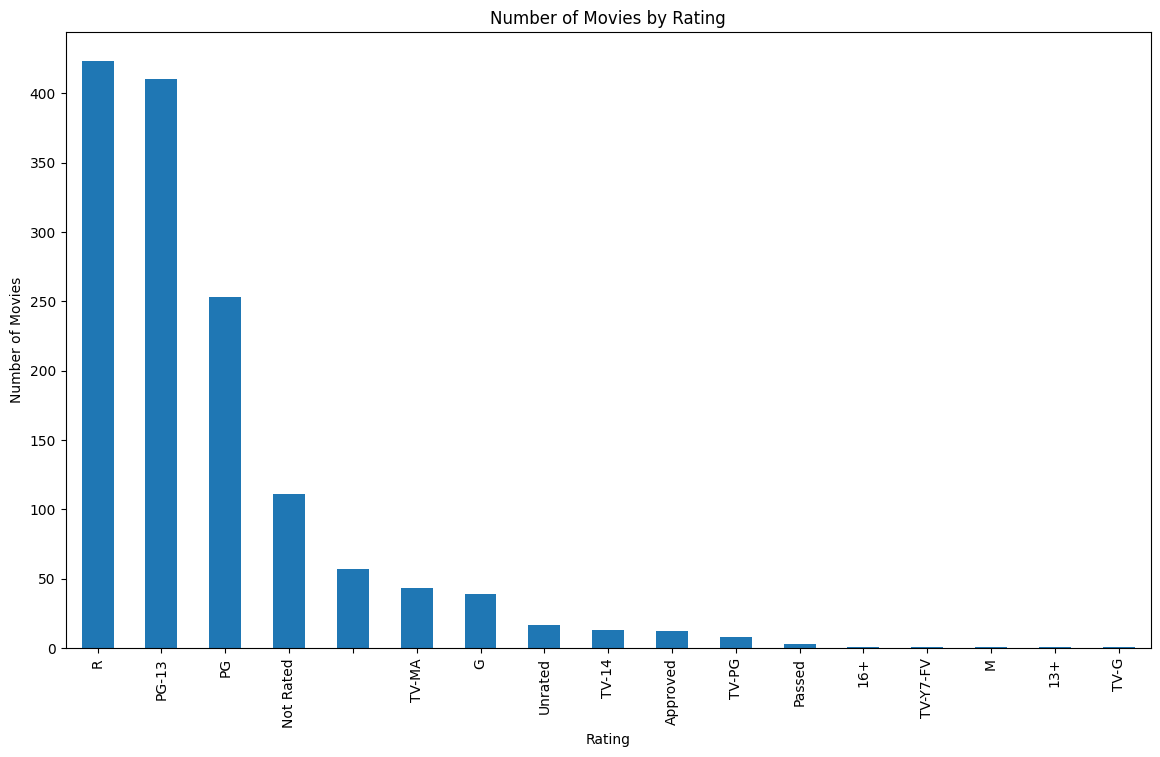

In [ ]:
ax = final_df['rating'].value_counts().plot(kind='bar',
                                   figsize=(14,8),
                                   title="Number of Movies by Rating")
ax.set_xlabel("Rating")
ax.set_ylabel("Number of Movies")
ax.plot();

In [ ]:
print('We can see that most of the movies have R raring followed by PG-13 and then PG')

We can see that most of the movies have R raring followed by PG-13 and then PG


In [ ]:
final_df[final_df['rating'] == 'Approved']

,movie,year,rating,genre,runtime_min,imdb,metascore,votes,n_imdb
315,Barbarella,1968.0,Approved,"[Adventure, Comedy, Fantasy]",98,5.8,51,36725,58.0
676,Rollerball,1975.0,Approved,"[Action, Sci-Fi, Sport]",125,6.6,56,27590,66.0
787,The Blob,1958.0,Approved,"[Horror, Sci-Fi]",86,6.3,58,28268,63.0
807,Invasion of the Body Snatchers,1956.0,Approved,"[Drama, Horror, Sci-Fi]",80,7.7,92,52901,77.0
882,The Curse of Frankenstein,1957.0,Approved,"[Horror, Sci-Fi, Thriller]",82,7.0,59,12066,70.0
927,On the Beach,1959.0,Approved,"[Drama, Romance, Sci-Fi]",134,7.1,55,14022,71.0
948,Demon Seed,1977.0,Approved,"[Horror, Sci-Fi]",94,6.3,55,9667,63.0
1067,The Absent Minded Professor,1961.0,Approved,"[Comedy, Family, Sci-Fi]",92,6.7,75,8944,67.0
1220,The Damned,1962.0,Approved,"[Drama, Fantasy, Horror]",87,6.6,72,3820,66.0
1254,Mighty Joe Young,1949.0,Approved,"[Adventure, Drama, Fantasy]",94,7.0,61,5557,70.0


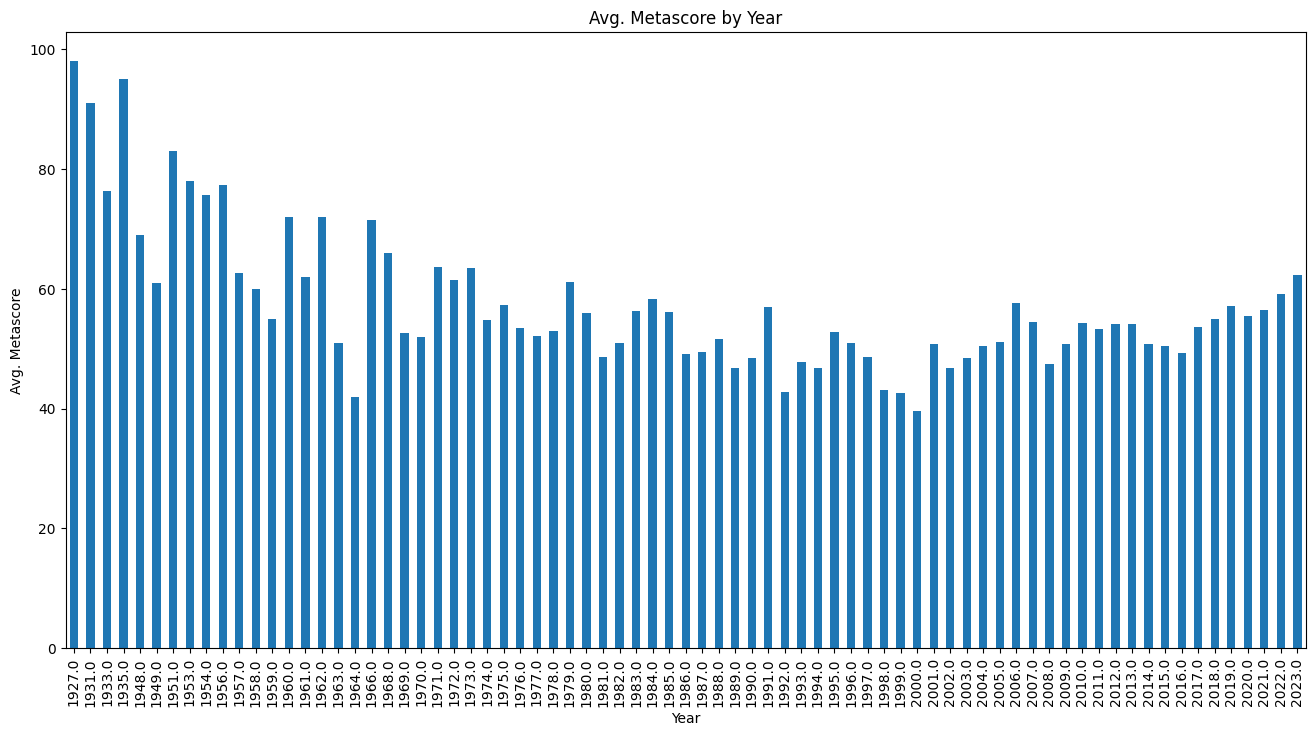

In [ ]:
# What are the average metascores by year?
final_df.groupby('year')['metascore'].mean().plot(kind='bar', figsize=(16,8), title="Avg. Metascore by Year", xlabel="Year", ylabel="Avg. Metascore")
plt.xticks(rotation=90)
plt.plot();



In [ ]:
# Describe the gradual decline in average Metascores over time
print("Gradual Decline in Average Metascores Over Time:")
print("------------------------------------------------")

print("In our analysis of average Metascores over the years, we observed a gradual, mild decline as we progressed through history.")
print("The average Metascores seem to have leveled out around the range of 55 to 60 in the last couple of decades.")
print("Several factors may contribute to this trend. One possible explanation is that newer movies tend to get reviewed more frequently, leading to a larger sample size for recent films.")
print("Additionally, changes in critical standards and tastes over time could also influence the ratings.")
print("This trend suggests an evolving landscape in the world of cinema reviews, reflecting both the diversity of movies released and the changing perspectives of critics.")

# End of description
print("------------------------------------------------")
print("End of Gradual Decline in Average Metascores Over Time.")


Gradual Decline in Average Metascores Over Time:
------------------------------------------------
In our analysis of average Metascores over the years, we observed a gradual, mild decline as we progressed through history.
The average Metascores seem to have leveled out around the range of 55 to 60 in the last couple of decades.
Several factors may contribute to this trend. One possible explanation is that newer movies tend to get reviewed more frequently, leading to a larger sample size for recent films.
Additionally, changes in critical standards and tastes over time could also influence the ratings.
This trend suggests an evolving landscape in the world of cinema reviews, reflecting both the diversity of movies released and the changing perspectives of critics.
------------------------------------------------
End of Gradual Decline in Average Metascores Over Time.


<Axes: >

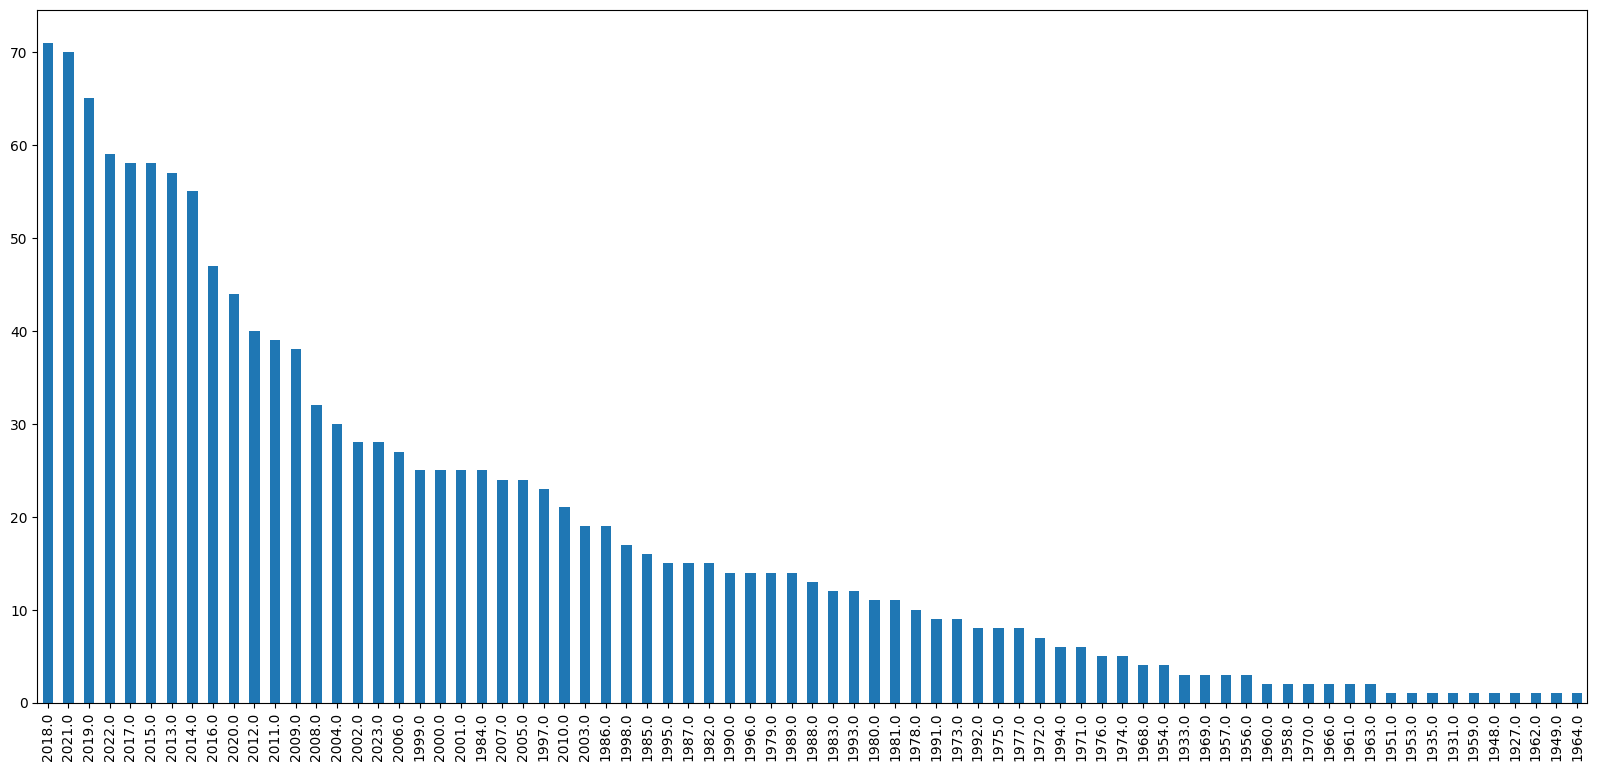

In [ ]:
final_df['year'].value_counts().plot(kind='bar', figsize=[20,9])

In [ ]:
# Describe the issue with the 1927 movie's score and representation of recent movies
print("Issue with 1927 Movie's Score and Representation of Recent Movies:")
print("-----------------------------------------------------------------")

print("Upon closer examination, it's evident that the 1927 movie's Metascore is based on a very small sample size, with only 1 review.")
print("As a result, the score for this movie may be biased and over-inflated, as it heavily relies on the single available review.")
print("In contrast, more recent movies benefit from better representation in reviews, allowing for a more accurate reflection of critical reception.")
print("The larger sample sizes for recent movies contribute to the stability and reliability of their Metascores.")

# End of description
print("-----------------------------------------------------------------")
print("End of Issue with 1927 Movie's Score and Representation of Recent Movies.")


Issue with 1927 Movie's Score and Representation of Recent Movies:
-----------------------------------------------------------------
Upon closer examination, it's evident that the 1927 movie's Metascore is based on a very small sample size, with only 1 review.
As a result, the score for this movie may be biased and over-inflated, as it heavily relies on the single available review.
In contrast, more recent movies benefit from better representation in reviews, allowing for a more accurate reflection of critical reception.
The larger sample sizes for recent movies contribute to the stability and reliability of their Metascores.
-----------------------------------------------------------------
End of Issue with 1927 Movie's Score and Representation of Recent Movies.
